In [1]:
import numpy as np
class Perceptron2(object):
    #初始化，设定学习率eta和迭代次数n_iter
    def __init__(self,eta=0.01,n_iter=10):
        self.eta=eta
        self.n_iter=n_iter

    #计算实际输出
    def net_input(self,x):
        return np.dot(x,self.w[1:])+self.w[0]
    
    #分类
    def predict(self, x):

        return np.where(self.net_input(x) >= 0.0, 1, -1)
    #修正权值
    
    def _shuffle(self,X,y):
    #打乱原来X的顺序，便于随机选取样本进行梯度下降
        r=np.random.permutation(len(y))
        return X[r],y[r]
    
    def _initialize(self,m):
    #初始化权值，初始化为0，添加增广矩阵
        self.w=np.zeros(1+m)
    
    def _update_w(self,xi,yi):
    #更新权值，一次根据一个样本更新
        output=self.net_input(xi)
        error=(yi-output)
        self.w[1:]+=self.eta*xi.dot(error)
        self.w[0]+=self.eta*error
        cost=0.5*error**2
        return cost
    def fit(self,X,y):
        self._initialize(X.shape[1])
        self.cost=[]
        for _ in range(self.n_iter):
            cost=[]
            X,y=self._shuffle(X,y)
            for xi,yi in zip(X,y):
                cost.append(self._update_w(xi,yi))
            avg_cost=sum(cost)/len(y)
            self.cost.append(avg_cost)
        return self
                
        

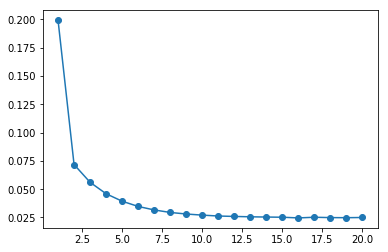

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Perceptron as per
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r'C:\Windows\Fonts\simkai.ttf',size=14)

#读取待分类数据，取第一，三特征进行分类
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
dfy=df.iloc[0:100,4].values
X=df.iloc[0:100,[0,2]].values
#print(X)

y=np.where(dfy=='Iris-setosa',1,-1)

X_std=np.copy(X)
X_std[:,0]=(X_std[:,0]-X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1]=(X_std[:,1]-X_std[:,1].mean())/X_std[:,1].std()

#plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
#plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
#plt.xlabel('sepal length')
#plt.ylabel('petal length')
#plt.legend(loc='upper left')
#plt.show()
#训练感知器
ppn=Perceptron2(eta=0.01,n_iter=20)
ppn.fit(X_std,y)
plt.plot(range(1,len(ppn.cost)+1),ppn.cost,marker='o')
